# Exercises - Carbon Footprint Regression

## Import Libraries

In [2]:
import pandas as pd
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Import Data

In [3]:
df = pd.read_csv("./exercises-carbon-footprint-regression-dataset.csv")
pd.set_option('display.max_columns', None)
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [5]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [6]:
df.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [7]:
df.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

In [8]:
df.nunique()

Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        5
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

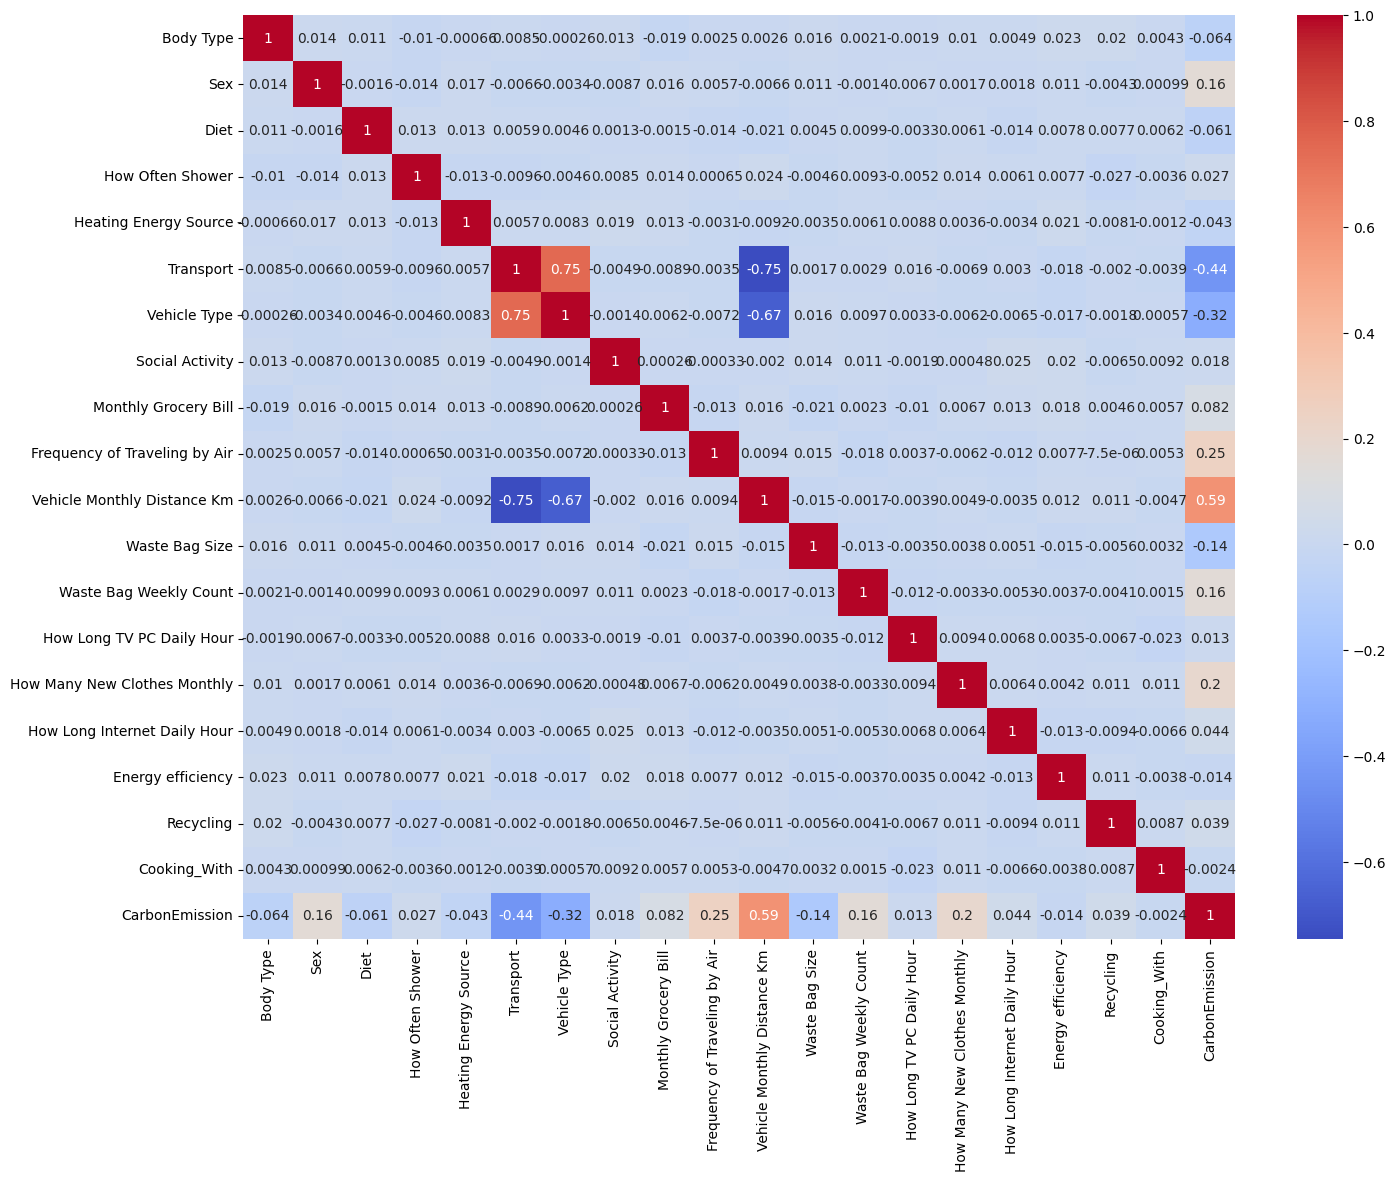

In [10]:
correlations = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models Training

In [13]:
%%time
linearregression = LinearRegression()
decisiontreeregression = DecisionTreeRegressor()
supportvectorregression = SVR(kernel='rbf')
randomforestregression = RandomForestRegressor()
xgbregression = XGBRegressor()

linearregression.fit(X_train, y_train)
decisiontreeregression.fit(X_train, y_train)
supportvectorregression.fit(X_train, y_train)
randomforestregression.fit(X_train, y_train)
xgbregression.fit(X_train, y_train)

CPU times: user 6.36 s, sys: 449 ms, total: 6.81 s
Wall time: 4.23 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Models Predict

In [14]:
%%time
y_lin = linearregression.predict(X_test)
y_dectree = decisiontreeregression.predict(X_test)
y_supvec = supportvectorregression.predict(X_test)
y_randfor = randomforestregression.predict(X_test)
y_xgb = xgbregression.predict(X_test)

CPU times: user 1.8 s, sys: 500 ms, total: 2.3 s
Wall time: 575 ms


## Scores

In [15]:
data1 = {"Regression Algorithms": ["Linear Regression", "Decision Tree Regression", 
                                       "Support Vector Regression", "Random Forest Classifier",
                                       "XGB Regression"],
      "Score": [r2_score(y_test,y_lin), r2_score(y_test, y_dectree), 
                r2_score(y_test, y_supvec), r2_score(y_test,y_randfor),
                r2_score(y_test, y_xgb) ]}

score = pd.DataFrame(data1)
print('r_squared metrics')
print(score)

r_squared metrics
       Regression Algorithms     Score
0          Linear Regression  0.587681
1   Decision Tree Regression  0.794454
2  Support Vector Regression  0.086633
3   Random Forest Classifier  0.910071
4             XGB Regression  0.974086


In [16]:
data2 = {"Regression Algorithms": ["Linear Regression", "Decision Tree Regression", 
                                       "Support Vector Regression", "Random Forest Classifier",
                                       "XGB Regression"],
      "Score": [mean_absolute_error(y_test,y_lin), mean_absolute_error(y_test, y_dectree), 
                mean_absolute_error(y_test, y_supvec), mean_absolute_error(y_test,y_randfor),
                mean_absolute_error(y_test, y_xgb) ]}


score2 = pd.DataFrame(data2)
print('mean absolute error')
print(score2)

mean absolute error
       Regression Algorithms       Score
0          Linear Regression  532.624044
1   Decision Tree Regression  358.564500
2  Support Vector Regression  731.761651
3   Random Forest Classifier  236.345645
4             XGB Regression  122.699821


## Neural Network

In [17]:
model = Sequential()

model.add(Dense(256, activation='relu',input_dim=19))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 662529 (2.53 MB)
Trainable params: 662529 (2.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

## Model Train

In [20]:
%%time 
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 633.2402 - mean_absolute_error: 633.2402
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 348.3225 - mean_absolute_error: 348.3225
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 306.8797 - mean_absolute_error: 306.8797
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 264.0641 - mean_absolute_error: 264.0641
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 238.4166 - mean_absolute_error: 238.4166
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 224.5789 - mean_absolute_error: 224.5789
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 213.3627 - mean_absolute_error: 213.3627
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 208.6421 - mean_absolute_error: 208.6421
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 191.99

## Model Predict

In [21]:
y_ann = model.predict(X_test)

63/63 [==============================] - 0s 568us/step


In [22]:
mean_absolute_error(y_test, y_ann)

134.5972799835205